# Project Deliverable 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.pipeline import make_pipeline

/Users/cyndichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
cirr_df = pd.read_csv('cirrhosis.csv')
cirr_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
print(cirr_df.shape)

(418, 20)


In [4]:
cirr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

## Handling Missing Values

In [5]:
#Count percent of missing value
percent_miss=((cirr_df.isna().sum())/cirr_df.shape[0])*100
percent_miss

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

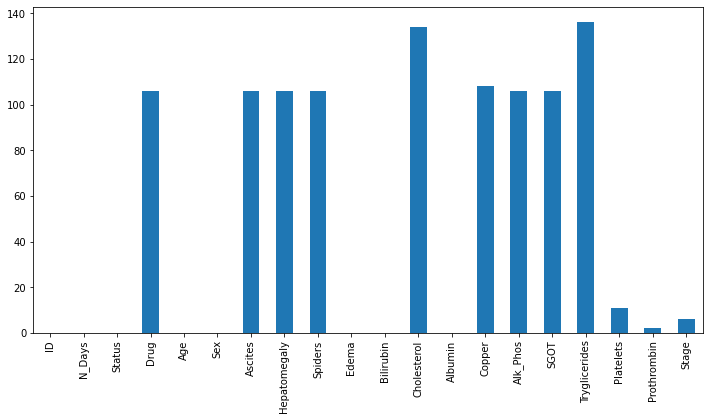

In [6]:
plt.figure(figsize = (12, 6))
cirr_df.isna().sum().plot.bar();

In [7]:
num_col_name = cirr_df.select_dtypes(include=(['int64','float64'])).columns
cat_col_name = cirr_df.select_dtypes(include=(['object'])).columns
print(num_col_name)
print(cat_col_name)

Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [8]:
#First fill in the missing values for numerical values (columns with dtypes as int64 and float64 )
for i in num_col_name.drop('Stage'):
  cirr_df[i] = cirr_df[i].fillna(cirr_df[i].mean())

((cirr_df.isna().sum())/cirr_df.shape[0])*100

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol       0.000000
Albumin           0.000000
Copper            0.000000
Alk_Phos          0.000000
SGOT              0.000000
Tryglicerides     0.000000
Platelets         0.000000
Prothrombin       0.000000
Stage             1.435407
dtype: float64

In [9]:
#Then fill in the missing values for numerical values (columns with dtypes as int64 and float64 )
for i in cat_col_name:
  cirr_df[i] = cirr_df[i].fillna(cirr_df[i].mode().values[0])

((cirr_df.isna().sum())/cirr_df.shape[0])*100

ID               0.000000
N_Days           0.000000
Status           0.000000
Drug             0.000000
Age              0.000000
Sex              0.000000
Ascites          0.000000
Hepatomegaly     0.000000
Spiders          0.000000
Edema            0.000000
Bilirubin        0.000000
Cholesterol      0.000000
Albumin          0.000000
Copper           0.000000
Alk_Phos         0.000000
SGOT             0.000000
Tryglicerides    0.000000
Platelets        0.000000
Prothrombin      0.000000
Stage            1.435407
dtype: float64

In [10]:
#First fill in the missing values for target variable
cirr_df['Stage'] = cirr_df['Stage'].fillna(cirr_df['Stage'].mode().values[0])

((cirr_df.isna().sum())/cirr_df.shape[0])*100

ID               0.0
N_Days           0.0
Status           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
dtype: float64

## Convert Abnormal Columns Values (Age)

In [11]:
#Change Age from days to years
cirr_df['Age']=(cirr_df['Age']/365).round()
cirr_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## Exploratory Data Analysis

In [12]:
cat_col_name.tolist()

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

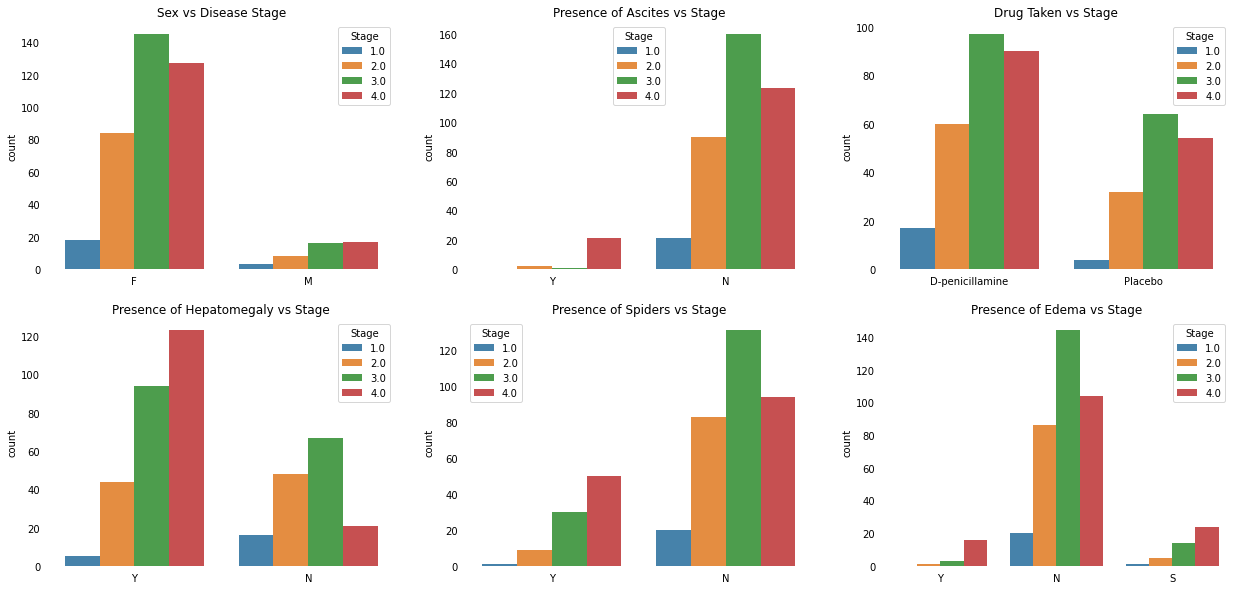

In [13]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=cirr_df['Sex'], hue=cirr_df['Stage'], alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Sex vs Disease Stage')

plt.subplot(2,3,2)
sns.countplot(x=cirr_df['Ascites'], hue=cirr_df['Stage'], alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Ascites vs Stage')

plt.subplot(2,3,3)
sns.countplot(x=cirr_df['Drug'], hue=cirr_df['Stage'], alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Drug Taken vs Stage');

plt.subplot(2,3,4)
sns.countplot(x=cirr_df['Hepatomegaly'], hue=cirr_df['Stage'], alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Hepatomegaly vs Stage');

plt.subplot(2,3,5)
sns.countplot(x=cirr_df['Spiders'], hue=cirr_df['Stage'], alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders vs Stage');

plt.subplot(2,3,6)
sns.countplot(x=cirr_df['Edema'], hue=cirr_df['Stage'], alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Edema vs Stage');

### Discovery:
1. The presence of Hepatomegaly will lead to higher risk of cirrhosis disease. 
2. The presence of Spiders will lead to higher risk of cirrhosis disease. 

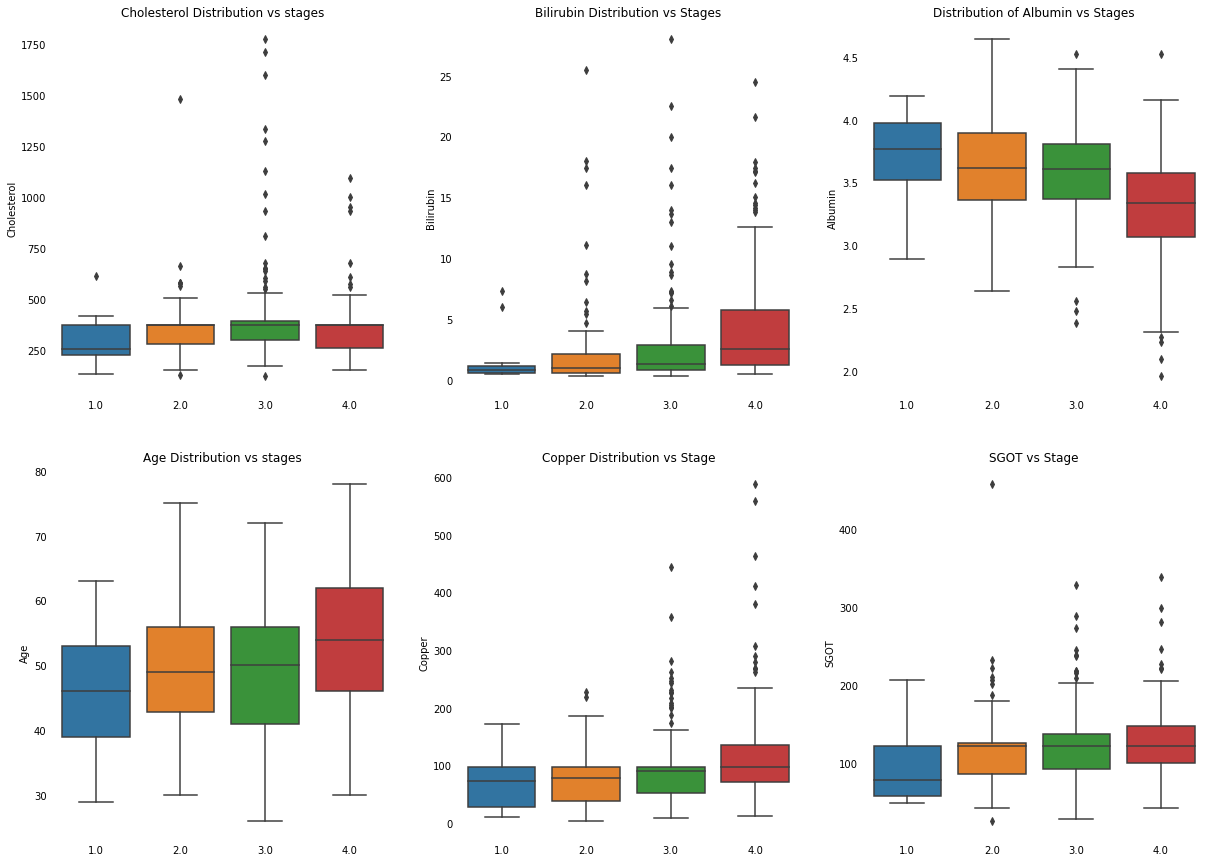

In [14]:
plt.figure(figsize=(20.6,15))

plt.subplot(2,3,1)
sns.boxplot(x=cirr_df['Stage'], y=cirr_df['Cholesterol'])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution vs stages');

plt.subplot(2,3,2)
sns.boxplot(x=cirr_df['Stage'], y=cirr_df['Bilirubin'])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin Distribution vs Stages');

plt.subplot(2,3,3)
sns.boxplot(x=cirr_df['Stage'], y=cirr_df['Albumin'])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Distribution of Albumin vs Stages');

plt.subplot(2,3,4)
sns.boxplot(x=cirr_df['Stage'], y=cirr_df['Age'])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution vs stages');

plt.subplot(2,3,5)
sns.boxplot(x=cirr_df['Stage'], y=cirr_df['Copper'])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper Distribution vs Stage');

plt.subplot(2,3,6)
sns.boxplot(x=cirr_df['Stage'], y=cirr_df['SGOT'])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT vs Stage');

### Discovery
1. There is a higher risk of cirhosis disease with higher age.
2. There is a higher risk of disease with increase of bilirubin.
3. There exists a negative correlation with presence of Albumin and the risk of disease.

## Preprocess the Data (Encode Categorical Data)

In [15]:
#Split the data into development and test, drop status and N_days because they will cause data leakage
X = cirr_df.drop(columns = ['Status', 'N_Days','Stage'])
y = cirr_df['Stage']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
one_enc = OneHotEncoder(handle_unknown='ignore')

one_hot_map_dev = one_enc.fit_transform(X_dev[['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']])
one_hot_map_dev_df = pd.DataFrame(one_hot_map_dev.toarray(), columns = one_enc.get_feature_names_out())

one_hot_map_dev_df

,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
330,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
331,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
332,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [17]:
one_enc = OneHotEncoder(handle_unknown='ignore')

one_hot_map_dev = one_enc.fit_transform(X_dev[['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']])
one_hot_map_dev_df = pd.DataFrame(one_hot_map_dev.toarray(), columns = one_enc.get_feature_names_out())
X_dev_preprocessed = X_dev.join(one_hot_map_dev_df)
X_dev_preprocessed.drop(['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'], axis = 1, inplace = True)
X_dev_preprocessed.fillna(0, inplace = True)

one_hot_map_test = one_enc.transform(X_test[['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']])
one_hot_map_test_df = pd.DataFrame(one_hot_map_test.toarray(), columns = one_enc.get_feature_names_out())
X_test_preprocessed = X_test.join(one_hot_map_test_df)
X_test_preprocessed.drop(['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'], axis = 1, inplace = True)
X_test_preprocessed.fillna(0, inplace = True)